# Gradient boosting
In dit notebook gaan wij kijken naar het model `Gradient boosting` en hoe dit model ons kan helpen bij de voorspellingen op onze dataset.

# Libraries importeren

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
import pickle


# Data importeren
De data die gebruikt wordt is de data die gegenereerd is in het notebook `2 - sample analysing` (de dataset zonder 100% NaN waardes).

In [2]:
df = pd.read_csv('../data/sample_without_100nan.csv')

# Gradient boosting

`Gradient boosting` zijn een aantal ensemble machine learning algoritmes die gebruikt kunnen worden voor classificatie of regressie problemen.

De ensembles zijn gemaakt van `decision tree modellen`. De trees worden stuk voor stuk toegevoegd aan de ensemble, en worden vervolgens gefit om zo de prediction errors, gemaakt door vorige modellen, op te lossen. Dit model wordt `boosting` genoemd.

Modellen zijn gefit met een `loss-functie` en `gradient descent optimization` algoritme. Dit geeft de techniek de naam `gradient boosting`, omdat de `loss gradient` geminimaliseerd wordt.

### Extreme Gradient Boosting (XGBoost)
XGBoost is een open-sourced implementatie van het `gradient boosting` algoritme. 

XGBoost is een populaire library doordat het XGBoost algoritme snel is, en tevens ook een goede model performance heeft.

## XGBoost classificatie

### Data cleaning

Als eerste maken wij een kopie aan van de originele dataframe. Mocht er ergens iets fout gaan, kunnen wij deze code gebruiken om de kopie te resetten.

In [3]:
df_copy = df.copy()

Vervolgens verwijderen wij de features `date`, `serial_number` en `model`. Deze hebben geen toevoegende waarde bij het predicten van de `failure` feature.

In [4]:
del df_copy['date']
del df_copy['serial_number']
del df_copy['model']

In [5]:
df_copy.head()

,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_194_raw,smart_197_raw,smart_198_raw
0,0,0.0,35462.0,0.0,0.0,22.0,0.0,0.0
1,0,0.0,12494.0,0.0,0.0,28.0,0.0,0.0
2,0,0.0,9544.0,0.0,0.0,29.0,0.0,0.0
3,0,0.0,13098.0,0.0,0.0,25.0,0.0,0.0
4,0,0.0,23427.0,0.0,0.0,32.0,0.0,0.0


#### NaN waardes

Binnen de sample zet zitten een aantal waardes die NaN zijn.

In [6]:
df_copy.isna().sum()

failure             0
smart_5_raw      6147
smart_9_raw      6147
smart_187_raw    6147
smart_188_raw    6147
smart_194_raw    6147
smart_197_raw    6147
smart_198_raw    6147
dtype: int64

Deze NaN waardes kunnen echter blijven staan. `XGBoost` zorgt zelf ervoor dat dit geen problemen veroorzaakt. `XGBoost` kijkt namelijk naar deze waardes en beslist vervolgens zelf waar deze waarde het best geplaatst kan worden, wanneer dit een NaN waarde is. Dit leert het algoritme zichzelf aan gedurende de trainingsfase. Meer hierover is terug te vinden in de [XGBoost documentatie](https://xgboost.readthedocs.io/en/stable/faq.html).

### Opsplitsen trainings- en validatieset

Wij voorspellen de `failure`.

De data wordt opgedeeld in matrices, waarbij `failure` als Y wordt gekozen.

In [9]:
X = df_copy.drop(['failure'], axis=1).values
y = df_copy['failure'].values

X.shape, y.shape

((22008389, 7), (22008389,))

Voor het opsplitsen van de data in een trainingsset en in een validatieset gebruiken we `Scikit-learn`. Een model wordt gebruikt om te trainen, en de andere wordt gebruikt om te testen.

De data wordt opgesplit in een 80/20 split.

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Model trainen

Het XGBoost model voor classificatie heet `XGBClassifier`. Wij creëeren en fitten een model met onze trainingset. Het model wordt gefit middels de `Scikit-learn` functie `fit()`.

De gebruikte parameters voor de training zijn de default parameters.

In [17]:
gb_model = xgb.XGBClassifier()
gb_model.fit(X_train, Y_train)

C:\Users\Dimitri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

De parameters kunnen weergeven worden door het model te printen.

In [4]:
print(gb_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)


### Predictions maken met het getrainde model

Om predicties te maken op het getrainde model, gebruiken we de `Scikit-learn` functie `predict()`.

In [11]:
y_pred = gb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

Nadat wij predictions gemaakt hebben op nieuwe data, kunnen we de performance van de predictions meten door ze te vergelijken met de verwachte waardes.

Hiervoor gebruiken we de `Scikit-learn` functie `accuracy_score()`.

In [14]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9999704658087212


In [16]:
precision = precision_score(Y_test, y_pred)
print('Precision: %f' % precision)

Precision: 0.250000


In [17]:
recall = recall_score(Y_test, y_pred)
print('Recall: %f' % recall)

Recall: 0.007812


In [18]:
f1 = f1_score(Y_test, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.015152


C:\Users\Dimitri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


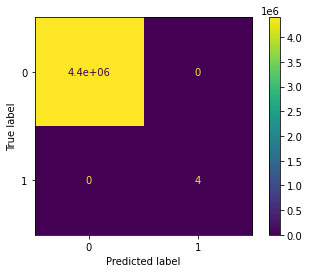

In [20]:
plot_confusion_matrix(gb_model, X_test, y_pred)

### Model opslaan en laden

Om te voorkomen dat we het model telkens weer moeten trainen, slaan we het getrainde model op via `Pickle`

#### Opslaan

In [23]:
pickle.dump(gb_model, open("../models/gradient_boosting.pkl", "wb"))

#### Laden

In [3]:
gb_model = pickle.load(open("../models/gradient_boosting.pkl", "rb"))